Source code for the graphs in Figures 9.4 and 9.5 (in _Computational Thinking and Problem Solving_ by Michael D. Smith. The graphs illustrate the results of the brute-force (BF) and Rabin-Karp (RK) string matching experiments described in Chapter 9. The test results are produced by `chap09/cmp_strmatch.py`.

This notebook's code was written by Michael D. Smith with help from ChatGPT 4o (November 2024). Last update: 20250609

In [1]:
import matplotlib.pyplot as plt

# x-axis indices (labels in kilobytes)
x_for_bars = [0, 1, 2, 3, 4, 5, 6]
x_for_lines = [327, 654, 1308, 2616, 5231, 10462, 20926]
x_labels = ['327', '654', '1308', '2616', '5231', '10462', '20926']

# In the FIRST TEST, the length of the pattern string (p) is much much
# less than the length of the text string (t).
y_bf_test1 = [0.065, 0.142, 0.255, 0.503, 1.064, 3.707, 5.858]
y_rk_test1 = [0.156, 0.289, 0.570, 1.125, 2.511, 4.611, 9.736]

# In the SECOND TEST, the length of the pattern string (p) is only slightly
# shorter than the length of the text string (t). It's about a quarter of
# the length. Note that I didn't wait for the 20926 results.
y_bf_test2 = [0.785, 3.199, 13.314, 53.569, 219.776, 890.305, 0]
y_rk_test2 = [0.136, 0.289, 0.551, 1.114, 2.353, 4.560, 0]

I decided that line plots best illustrated the points I wanted to make with the results. The next code block produces the two line plots.

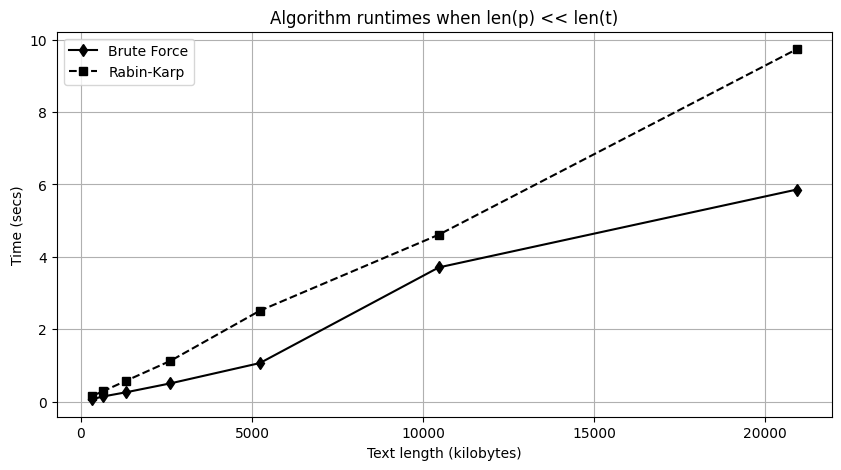

In [6]:
# Figure 9.4: Plot the FIRST TEST as a line graph so that it is
# easy to see the O(n) growth for both algorithms.

plt.figure(figsize=(10, 5))
plt.plot(x_for_lines, y_bf_test1, marker='d', color='black', linestyle='-', label='Brute Force')
plt.plot(x_for_lines, y_rk_test1, marker='s', color='black', linestyle='--', label='Rabin-Karp')
plt.xlabel("Text length (kilobytes)")
plt.ylabel("Time (secs)")
plt.title("Algorithm runtimes when len(p) << len(t)")
plt.legend()
plt.grid(True)

# plt.show()
plt.savefig('Smith_fig_09-04.png', dpi=600)  # 'dpi=600' for higher resolution

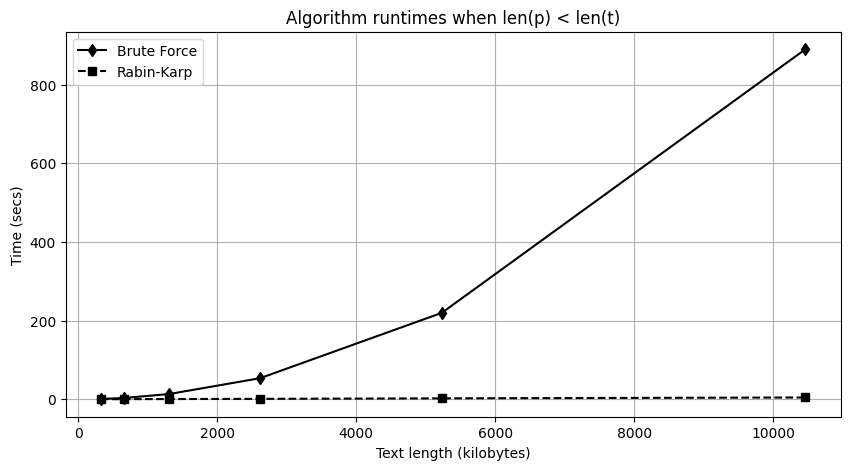

In [5]:
# Figure 9.5: Plot the SECOND TEST in a line graph so that it is
# easy to see the O(n) and O(n^2) growth.

plt.figure(figsize=(10, 5))
plt.plot(x_for_lines[:6], y_bf_test2[:6], marker='d', color='black', linestyle='-', label='Brute Force')
plt.plot(x_for_lines[:6], y_rk_test2[:6], marker='s', color='black', linestyle='--', label='Rabin-Karp')
plt.xlabel("Text length (kilobytes)")
plt.ylabel("Time (secs)")
plt.title("Algorithm runtimes when len(p) < len(t)")
plt.legend()
plt.grid(True)

# plt.show()
plt.savefig('Smith_fig_09-05.png', dpi=600)  # 'dpi=600' for higher resolution

## Extra code

I created code to plot the results as bar charts, but these weren't very informative or helpful. They are not used in the book.

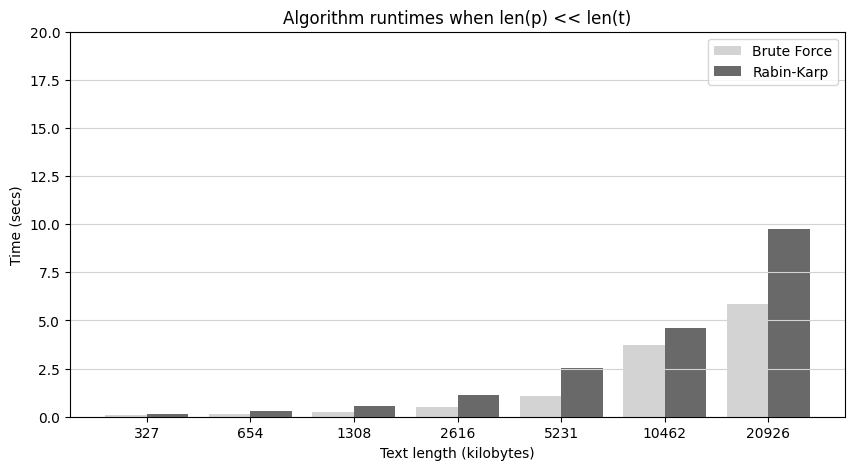

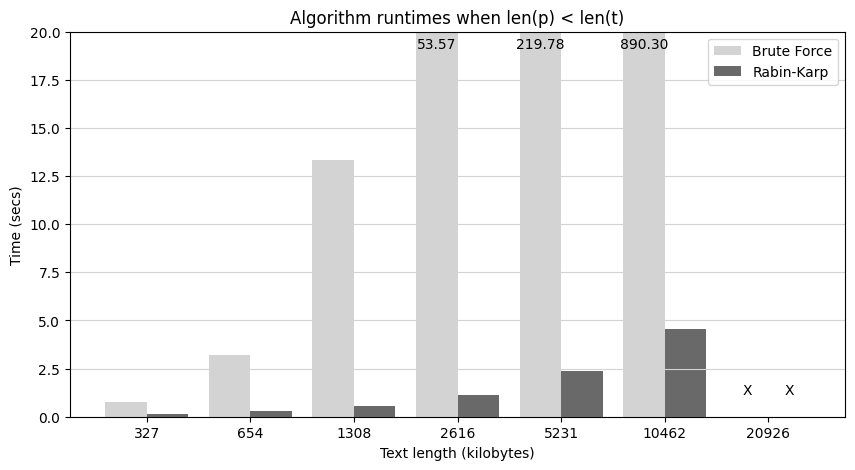

In [ ]:
# Create bar charts of the results

# Plot Test 1 data: grayscale; y-axis max set to 20
plt.figure(figsize=(10, 5))
bars_bf = plt.bar(x_for_bars, y_bf_test1,
                  width=0.4, label='Brute Force', color='lightgray', align='center')
bars_rk = plt.bar([i + 0.4 for i in x_for_bars], y_rk_test1,
                  width=0.4, label='Rabin-Karp', color='dimgray', align='center')
plt.xlabel("Text length (kilobytes)")
plt.ylabel("Time (secs)")
plt.ylim(0, 20)  # Set y-axis maximum to 20
plt.title("Algorithm runtimes when len(p) << len(t)")
plt.xticks([i + 0.2 for i in x_for_bars], x_labels)  # Adjust x-ticks for alignment
plt.legend()
plt.grid(True, axis='y', color='lightgray')

plt.show()

# Plot Test 2 data: grayscale; y-axis max set to 20; label bars when time
# exceeds the y-axis max.
plt.figure(figsize=(10, 5))
bars_bf = plt.bar(x_for_bars, y_bf_test2,
                  width=0.4, label='Brute Force', color='lightgray', align='center')
bars_rk = plt.bar([i + 0.4 for i in x_for_bars], y_rk_test2,
                  width=0.4, label='Rabin-Karp', color='dimgray', align='center')
plt.xlabel("Text length (kilobytes)")
plt.ylabel("Time (secs)")
plt.ylim(0, 20)  # Set y-axis maximum to 20
plt.title("Algorithm runtimes when len(p) < len(t)")
plt.xticks([i + 0.2 for i in x_for_bars], x_labels)  # Adjust x-ticks for alignment
plt.legend()
plt.grid(True, axis='y', color='lightgray')

# Add text labels for BF runtimes exceeding the y-axis limit
for bar in bars_bf:
    if bar.get_height() > 20:
        plt.text(bar.get_x() + bar.get_width() / 2, 19, f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add text label for tests that didn't complete
plt.text(bars_bf[6].get_x() + bars_bf[6].get_width() / 2, 1, f'X', ha='center', va='bottom')
plt.text(bars_rk[6].get_x() + bars_rk[6].get_width() / 2, 1, f'X', ha='center', va='bottom')

plt.show()